### Importing necessary libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

### Loading the dataset

In [50]:
df = pd.read_csv('cbb.csv')
df.head(30)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


In [51]:
features = df[['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']]
target = df['W']

summary_table = df.groupby(['CONF', 'TEAM'])['W'].agg(Wins='sum', Losses=lambda x: x.count()).reset_index()
print(summary_table)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training Data Shapes:", X_train.shape, y_train.shape)
print("Testing Data Shapes:", X_test.shape, y_test.shape)

    CONF                 TEAM  Wins  Losses
0    A10               Butler    26       1
1    A10            Charlotte    21       1
2    A10             Davidson   160       8
3    A10               Dayton   214      10
4    A10             Duquesne   128      10
..   ...                  ...   ...     ...
470  ind  Cal St. Bakersfield    10       1
471  ind          Chicago St.    11       1
472  ind             Hartford     5       1
473  ind                 NJIT     9       1
474  ind          New Orleans     4       1

[475 rows x 4 columns]
Training Data Shapes: (2818, 16) (2818,)
Testing Data Shapes: (705, 16) (705,)


In [52]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

logreg = LogisticRegression(random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

model = grid_search.best_estimator_
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Report:", report)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best Hyperparameters: {'C': 10}
Accuracy: 0.16879432624113475
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.33      0.67      0.44         3
           4       0.50      0.10      0.17        10
           5       0.40      0.24      0.30        17
           6       0.17      0.20      0.18        10
           7       0.19      0.26      0.22        19
           8       0.18      0.11      0.14        18
           9       0.23      0.18      0.20        38
          10       0.24      0.22      0.23        32
          11       0.15      0.27      0.19        37
          12       0.23      0.17      0.19        42
          13       0.03      0.03      0.03        31
          14       0.22      0.31      0.25        49
          15       0.12      0.14      0.13        36
          1

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: 

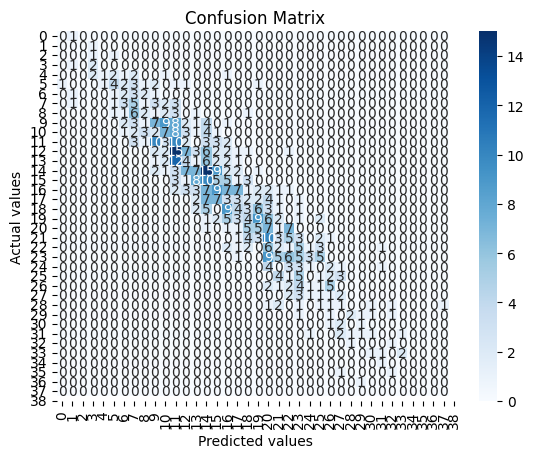

In [53]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.savefig('confusion_matrix.png')
plt.show()

In [54]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix_tree = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Report:\n", report)

Accuracy: 0.11631205673758865
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.25      0.67      0.36         3
           4       0.25      0.20      0.22        10
           5       0.43      0.18      0.25        17
           6       0.12      0.20      0.15        10
           7       0.13      0.16      0.14        19
           8       0.12      0.11      0.12        18
           9       0.11      0.11      0.11        38
          10       0.12      0.12      0.12        32
          11       0.10      0.14      0.11        37
          12       0.18      0.21      0.20        42
          13       0.07      0.06      0.07        31
          14       0.19      0.16      0.18        49
          15       0.03      0.03      0.03        36
          16       0.15      0.13      0.1

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

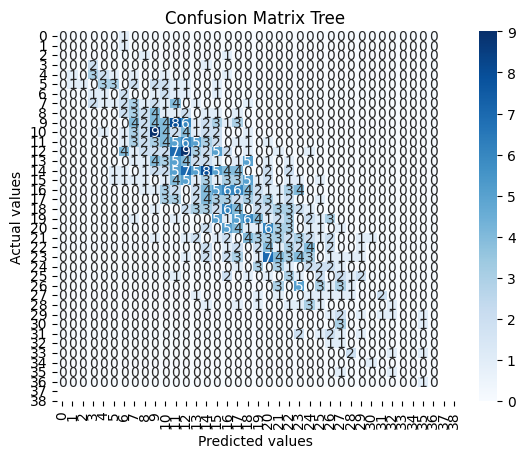

In [55]:
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.savefig('confusion_matrix_tree.png')
plt.show()

In [56]:
def classify_team_strength(row):
    if row['WAB'] > 10:
        return 'strong'
    elif row['WAB'] > 0:
        return 'average'
    else:
        return 'weak'

In [57]:
df['Team_Strenght'] = df.apply(classify_team_strength, axis=1)

target_strenght = df['Team_Strenght']

X_train, X_test, y_train, y_test = train_test_split(features, target_strenght, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

model = LogisticRegression(random_state=42, multi_class='multinomial')
model.fit(X_train_scaled, y_train_encoded)

predictions = model.predict(X_test_scaled)
predicted_classes = le.inverse_transform(predictions)

accuracy = accuracy_score(y_test, predicted_classes)
report = classification_report(y_test, predicted_classes)

print("Accuracy:", accuracy)
print("\nReport:", report)

Accuracy: 0.9843971631205674

Report:               precision    recall  f1-score   support

     average       0.90      0.99      0.94        95
      strong       0.00      0.00      0.00         5
        weak       1.00      0.99      1.00       605

    accuracy                           0.98       705
   macro avg       0.63      0.66      0.65       705
weighted avg       0.98      0.98      0.98       705



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: 

In [58]:
df.head(30)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Team_Strenght
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,average
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,strong
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,average
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,average
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,average
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014,average
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013,average
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,strong
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,strong
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017,average


Strong teams: 16
Average teams: 507
Weak teams: 3000


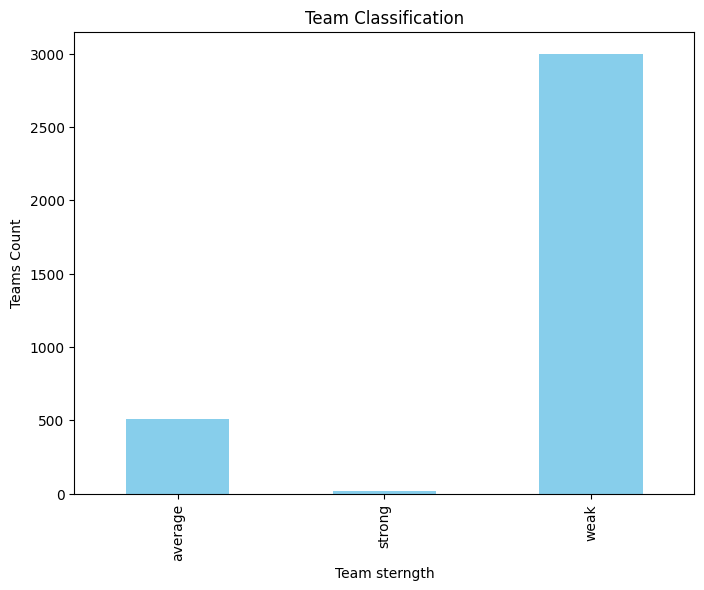

In [59]:
class_counts = df['Team_Strenght'].value_counts()
print("Strong teams:", class_counts['strong'])
print("Average teams:", class_counts['average'])
print("Weak teams:", class_counts['weak'])

plt.figure(figsize=(8, 6))
class_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Team Classification')
plt.xlabel('Team sterngth')
plt.ylabel('Teams Count')
plt.show()

### Preprocessing for a specific column in the dataset

In [60]:
df_d1_conf = pd.read_csv('cbb.csv', index_col="CONF")

postseason_mapping = {
    'Champions': 1,
    '2ND': 2,
    'F4': 4,
    'E8': 8,
    'S16': 16,
    'R32': 32,
    'R64': 64,
    'R68': 68
}

df_d1_conf['POSTSEASON'] = df_d1_conf['POSTSEASON'].replace(postseason_mapping)
df_d1_conf.head(30)

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
CONF,,,,,,,,,,,,,,,,,,,,,
ACC,North Carolina,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2.0,1.0,2016
B10,Wisconsin,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2.0,1.0,2015
B10,Michigan,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2.0,3.0,2018
B12,Texas Tech,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2.0,3.0,2019
WCC,Gonzaga,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2.0,1.0,2017
SEC,Kentucky,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,16.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2.0,8.0,2014
B10,Michigan,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,18.7,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2.0,4.0,2013
ACC,Duke,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,18.6,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,1.0,1.0,2015
ACC,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1.0,1.0,2019


### Visualization of Wins by Conference

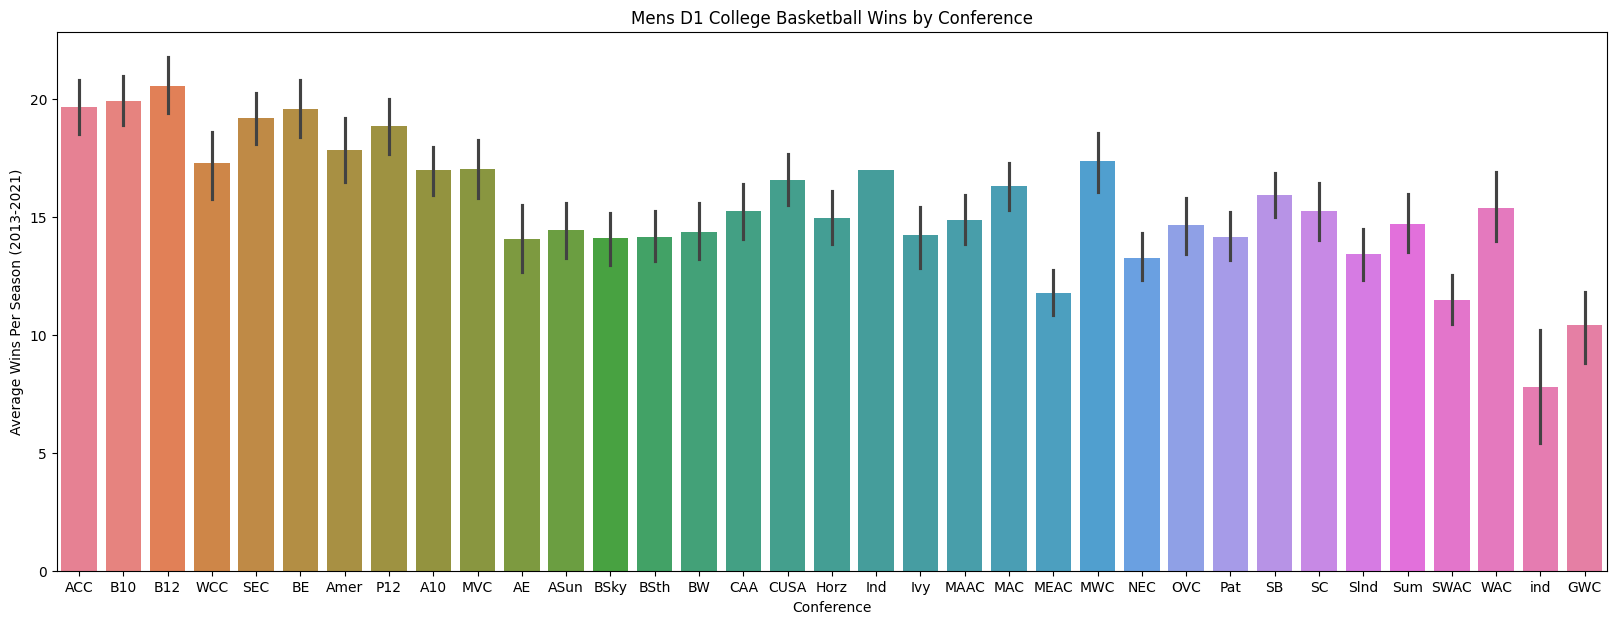

In [61]:
colors = sns.color_palette("husl", n_colors=len(df_d1_conf.index))

plt.figure(figsize=(20,7))
plt.title("Mens D1 College Basketball Wins by Conference")
sns.barplot(x=df_d1_conf.index, y=df_d1_conf['W'], hue=df_d1_conf.index, dodge=False)
plt.ylabel("Average Wins Per Season (2013-2021)")
plt.xlabel("Conference")
plt.show()

### Data filtering and correlation matrix

In [62]:
selected_columns = ['TEAM', 'W', 'POSTSEASON', '3P_O', '3P_D']
data_filtered = df_d1_conf[selected_columns].copy()
data_filtered = data_filtered.dropna()
data_filtered.sort_values(by='POSTSEASON', key=lambda x: x.astype(int))

,TEAM,W,POSTSEASON,3P_O,3P_D
CONF,,,,,
BE,Louisville,35,1.0,33.3,31.8
BE,Connecticut,31,1.0,36.3,29.7
B12,Kansas,34,1.0,36.1,29.8
B12,Baylor,22,1.0,41.8,34.0
ACC,Duke,35,1.0,38.7,31.4
...,...,...,...,...,...
BE,Providence,20,68.0,37.1,32.8
BE,St. John's,21,68.0,35.8,34.2
MAAC,Manhattan,19,68.0,33.6,32.4


### Displaying correlation matrix

                3P_O      3P_D         W  POSTSEASON
3P_O        1.000000  0.160372  0.229885   -0.117840
3P_D        0.160372  1.000000 -0.182050    0.146080
W           0.229885 -0.182050  1.000000   -0.512628
POSTSEASON -0.117840  0.146080 -0.512628    1.000000


<Axes: ylabel='CONF'>

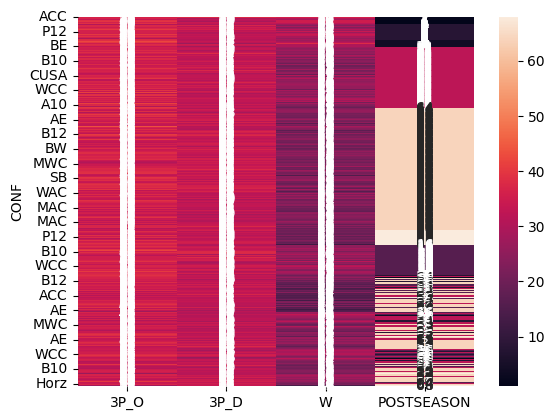

In [63]:
correlation_matrix = data_filtered[['3P_O', '3P_D', 'W', 'POSTSEASON']].corr()
print(correlation_matrix)

heatmap = data_filtered[['3P_O', '3P_D', 'W', 'POSTSEASON']].copy()
sns.heatmap(heatmap, annot=True)

### Further analysis with additional columns

In [64]:
adje_columns = ['TEAM', 'YEAR', 'W', 'POSTSEASON', 'ADJOE', 'ADJDE']
adje_df = df_d1_conf[adje_columns].copy()
adje_df = adje_df.dropna()
adje_df.sort_values(by='ADJOE', ascending = False)

,TEAM,YEAR,W,POSTSEASON,ADJOE,ADJDE
CONF,,,,,,
B10,Wisconsin,2015,36,2.0,129.1,93.6
BE,Villanova,2018,36,1.0,128.4,94.1
B12,Oklahoma St.,2017,20,64.0,126.8,102.3
ACC,Duke,2014,26,64.0,125.9,98.6
WCC,Gonzaga,2021,26,2.0,125.4,89.8
...,...,...,...,...,...,...
NEC,Mount St. Mary's,2021,12,68.0,95.7,100.6
SWAC,Texas Southern,2023,14,68.0,95.4,105.4
MEAC,North Carolina Central,2018,19,68.0,95.0,110.3


### Correlation matrix for additional columns

In [65]:
adje_correlation_matrix = adje_df[['W', 'POSTSEASON', 'ADJOE', 'ADJDE']].corr()
adje_correlation_matrix

,W,POSTSEASON,ADJOE,ADJDE
W,1.000000,-0.512628,0.487452,-0.398886
POSTSEASON,-0.512628,1.000000,-0.526697,0.462659
ADJOE,0.487452,-0.526697,1.000000,-0.291734
ADJDE,-0.398886,0.462659,-0.291734,1.000000


### Calculating team effectiveness

In [66]:
effectiveness = adje_df.copy()
effectiveness['EFF'] = effectiveness['ADJOE'] - effectiveness['ADJDE']
effectiveness_correlation_matrix = effectiveness[['W', 'POSTSEASON', 'EFF']].corr()
effectiveness_correlation_matrix

,W,POSTSEASON,EFF
W,1.000000,-0.512628,0.555072
POSTSEASON,-0.512628,1.000000,-0.617714
EFF,0.555072,-0.617714,1.000000


### Plotting average ADJDE and ADJOE for successful postseason teams

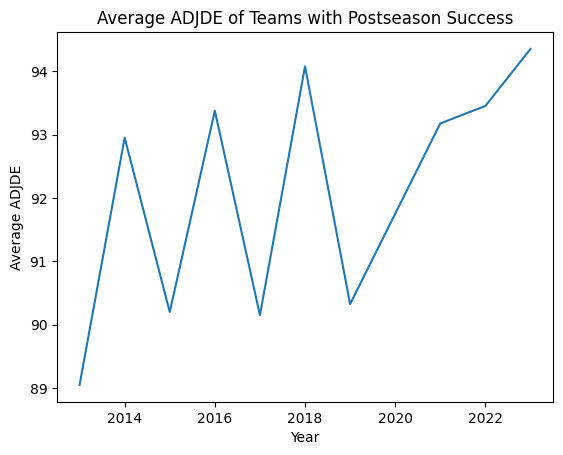

Correlation between Postseason Success and ADJDE: 0.2653239079376732


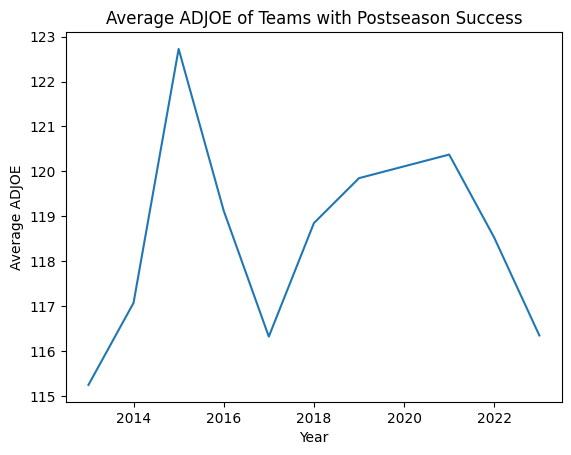

Correlation between Postseason Success and ADJOE: -0.3726072849733545


In [67]:
good_postseason_teams = adje_df[adje_df['POSTSEASON'] <= 4]
good_postseason_teams.reset_index()
avg_adjde_by_year = good_postseason_teams.groupby('YEAR')['ADJDE'].mean()
avg_adjoe_by_year = good_postseason_teams.groupby('YEAR')['ADJOE'].mean()

plt.plot(avg_adjde_by_year.index, avg_adjde_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average ADJDE')
plt.title('Average ADJDE of Teams with Postseason Success')
plt.show()
correlation_adjde = good_postseason_teams['POSTSEASON'].corr(good_postseason_teams['ADJDE'])
print(f"Correlation between Postseason Success and ADJDE: {correlation_adjde}")

plt.plot(avg_adjoe_by_year.index, avg_adjoe_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average ADJOE')
plt.title('Average ADJOE of Teams with Postseason Success')
plt.show()
correlation_adjoe = good_postseason_teams['POSTSEASON'].corr(good_postseason_teams['ADJOE'])
print(f"Correlation between Postseason Success and ADJOE: {correlation_adjoe}")

### Analyzing tempo columns

In [68]:
tempo_columns = ['TEAM', 'YEAR', 'W', 'POSTSEASON', 'ADJ_T', 'TOR', 'TORD']
tempo_df = df_d1_conf[tempo_columns].copy().dropna()
tempo_df['TORPM'] = tempo_df['TORD'] - tempo_df['TOR']

tempo_df.sort_values(by='TORPM', ascending = False)

,TEAM,YEAR,W,POSTSEASON,ADJ_T,TOR,TORD,TORPM
CONF,,,,,,,,
A10,VCU,2013,27,32.0,68.1,16.9,28.5,11.6
B12,West Virginia,2017,28,16.0,72.2,17.0,27.6,10.6
Amer,Louisville,2014,31,16.0,68.8,15.3,25.0,9.7
B12,West Virginia,2015,25,16.0,68.6,18.7,28.0,9.3
BE,Louisville,2013,35,1.0,67.1,18.3,27.0,8.7
...,...,...,...,...,...,...,...,...
BSky,Weber St.,2014,17,64.0,64.3,19.0,13.8,-5.2
B10,Maryland,2019,23,32.0,67.7,19.4,14.1,-5.3
BE,Georgetown,2021,13,64.0,69.5,21.7,16.2,-5.5


### Correlation matrix for tempo-related columns

In [69]:
tempo_corr_matrix = tempo_df[['W', 'POSTSEASON', 'ADJ_T', 'TOR', 'TORD', 'TORPM']].corr()
tempo_corr_matrix

,W,POSTSEASON,ADJ_T,TOR,TORD,TORPM
W,1.000000,-0.512628,-0.035333,-0.267636,0.080179,0.244970
POSTSEASON,-0.512628,1.000000,0.045887,0.203684,-0.047833,-0.175254
ADJ_T,-0.035333,0.045887,1.000000,-0.020069,-0.000866,0.012538
TOR,-0.267636,0.203684,-0.020069,1.000000,0.139224,-0.543289
TORD,0.080179,-0.047833,-0.000866,0.139224,1.000000,0.755731
TORPM,0.244970,-0.175254,0.012538,-0.543289,0.755731,1.000000


### Predictive modeling for postseason success

In [70]:
df_postseason_teams = df_d1_conf.copy().dropna()
features = ['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'SEED', 'EFG_O', 'EFG_D']
y = df_postseason_teams.POSTSEASON
x = df_postseason_teams[features]
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 1)
first_model = RandomForestRegressor(random_state = 1)
first_model.fit(train_x, train_y)
predictions = first_model.predict(val_x)
first_model_mae = mean_absolute_error(predictions, val_y)
print(predictions[:10])
print(val_y[:10])
print("1st model MAE:", first_model_mae)

[60.6  12.27 59.76 45.08 60.92 43.44 35.96 20.14 15.4  63.04]
CONF
Horz    64.0
B12      8.0
AE      64.0
MVC      4.0
Pat     64.0
B12     16.0
B10     32.0
SEC     16.0
BE      32.0
SB      68.0
Name: POSTSEASON, dtype: float64
1st model MAE: 12.944941176470588


### Linear mapping for postseason levels

In [71]:
linear_postseason_mapping = {
    68 : 1,
    64 : 2,
    32 : 3,
    16 : 4,
    8 : 5,
    4 : 6,
    2 : 7,
    1 : 8
}
df_postseason_teams['POSTSEASON'] = df_postseason_teams['POSTSEASON'].replace(linear_postseason_mapping)
df_postseason_teams.sort_values(by='POSTSEASON')

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
CONF,,,,,,,,,,,,,,,,,,,,,
OVC,Southeast Missouri St.,34,19,99.4,107.8,0.2823,50.1,51.3,17.3,19.0,...,44.1,50.3,50.7,33.2,35.0,72.0,-11.7,1.0,16.0,2023
WCC,BYU,33,23,118.3,100.3,0.8699,53.2,49.6,16.4,17.7,...,39.2,50.2,49.6,39.0,33.1,70.8,0.8,1.0,11.0,2015
B10,Iowa,33,20,121.2,99.2,0.9089,51.1,47.4,15.9,18.8,...,35.4,50.6,47.3,35.0,31.7,70.9,1.2,1.0,11.0,2014
BE,Xavier,34,21,112.0,99.5,0.7965,51.7,49.4,18.7,16.9,...,39.5,51.5,47.4,34.8,35.2,66.0,1.4,1.0,12.0,2014
NEC,Mount St. Mary's,33,16,107.1,111.0,0.3986,51.5,53.5,16.7,18.8,...,34.5,50.2,54.6,35.5,33.4,69.9,-9.4,1.0,16.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B12,Kansas,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,18.1,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,8.0,1.0,2022
BE,Connecticut,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,18.5,...,37.8,53.6,44.4,36.3,29.7,66.7,5.0,8.0,4.0,2023
B12,Baylor,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,24.6,...,31.7,54.1,48.1,41.8,34.0,68.8,6.6,8.0,1.0,2021


### Second predictive modeling with updated target

In [72]:
y2 = df_postseason_teams.POSTSEASON
x2 = df_postseason_teams[features]
train_x2, val_x2, train_y2, val_y2 = train_test_split(x2, y2, random_state = 1)
second_model = RandomForestRegressor(random_state = 1)
second_model.fit(train_x2, train_y2)
predictions2 = second_model.predict(val_x2)
second_model_mae = mean_absolute_error(predictions2, val_y2)
print(predictions2[:10])
print(val_y2[:10])
print("2nd model MAE:", second_model_mae)

[2.17 4.96 2.09 2.79 2.06 2.91 3.65 3.89 4.4  1.97]
CONF
Horz    2.0
B12     5.0
AE      2.0
MVC     6.0
Pat     2.0
B12     4.0
B10     3.0
SEC     4.0
BE      3.0
SB      1.0
Name: POSTSEASON, dtype: float64
2nd model MAE: 0.6627058823529411


### Feature importance analysis for the second model

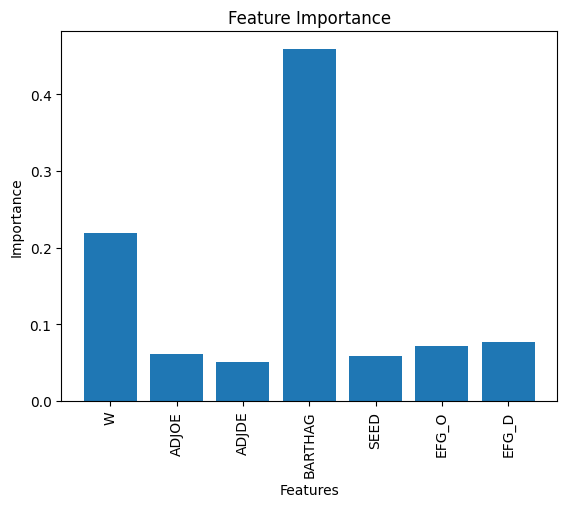

In [73]:
importances = second_model.feature_importances_

plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Third predictive modeling with additional features

In [74]:
features2 = features.copy()
features2.append('WAB')
y3 = df_postseason_teams.POSTSEASON
x3 = df_postseason_teams[features2]
train_x3, val_x3, train_y3, val_y3 = train_test_split(x3, y3, random_state = 1)
third_model = RandomForestRegressor(random_state = 1)
third_model.fit(train_x3, train_y3)
predictions3 = third_model.predict(val_x3)
third_model_mae = mean_absolute_error(predictions3, val_y3)
print("3rd model MAE:", third_model_mae)

3rd model MAE: 0.6635294117647059


### Feature importance analysis for the third model

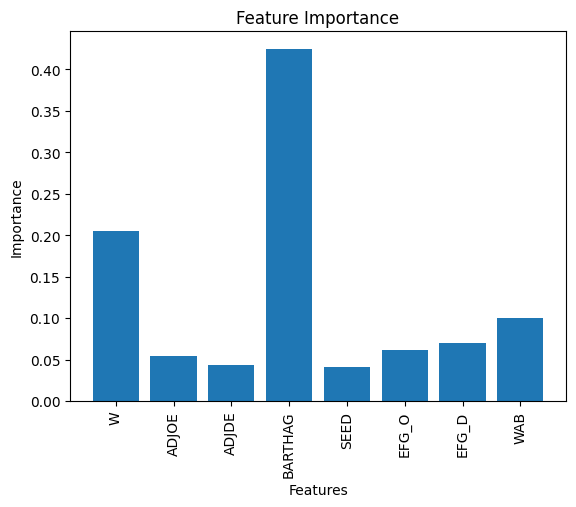

In [75]:
importances2 = third_model.feature_importances_

plt.bar(range(len(importances2)), importances2)
plt.xticks(range(len(importances2)), features2, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Exploratory data analysis on the original dataset

In [76]:
cbb = pd.read_csv('cbb.csv')
cbb.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


### Filtering teams from specific conferences

In [77]:
cbb_teams = cbb[(cbb.CONF == 'ACC') | (cbb.CONF == 'BE')].copy()
cbb_teams.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
14,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,...,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0,2015
15,Notre Dame,ACC,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,...,24.1,58.2,47.4,39.0,32.6,63.9,8.6,E8,3.0,2015
16,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016


### Descriptive statistics for a specific column

In [78]:
cbb_teams[['TEAM']].describe()

,TEAM
count,255
unique,30
top,North Carolina
freq,10


### Handling missing values and exploring specific columns

In [79]:
cbb_teams.fillna({'POSTSEASON':'Missed Tournament'}, inplace=True)
cbb_teams.POSTSEASON.value_counts(dropna=False)

POSTSEASON
Missed Tournament    135
R64                   42
R32                   29
S16                   19
E8                    12
Champions              7
F4                     5
R68                    4
2ND                    2
Name: count, dtype: int64

In [80]:
cbb_teams.fillna({'SEED':'Missed Tournament'}, inplace = True)
cbb_teams.SEED.value_counts(dropna=False)

SEED
Missed Tournament    135
1.0                   14
2.0                   14
4.0                   13
9.0                   12
11.0                  12
8.0                   12
6.0                   10
10.0                   9
5.0                    9
3.0                    8
7.0                    4
12.0                   3
Name: count, dtype: int64

In [81]:
cbb_teams.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

### Exploring subsets of data based on specific conditions

In [82]:
new_ao = cbb_teams[ (cbb_teams['ADJOE'] >= 115) ].copy()
new_ao.sort_values(by=['ADJOE'], ascending=False)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
2307,Duke,ACC,35,26,125.9,98.6,0.9432,53.8,49.3,14.6,...,40.8,50.3,50.3,39.5,30.7,66.7,6.5,R64,3.0,2014
15,Notre Dame,ACC,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,...,24.1,58.2,47.4,39.0,32.6,63.9,8.6,E8,3.0,2015
2118,Creighton,BE,35,27,125.2,101.9,0.9144,58.9,48.5,15.0,...,33.0,56.3,47.0,41.4,34.2,65.4,5.6,R32,3.0,2014
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
2806,Duke,ACC,39,32,122.7,96.0,0.9440,55.6,47.1,15.0,...,19.1,56.0,46.6,36.6,32.0,67.4,7.2,F4,2.0,2022
2371,Wake Forest,ACC,33,19,122.4,102.6,0.8831,54.1,52.7,16.4,...,38.0,52.1,52.1,38.5,35.8,72.0,1.3,R68,11.0,2017


### Visualization of a relationship between variables

Text(0, 0.5, 'ADJOE')

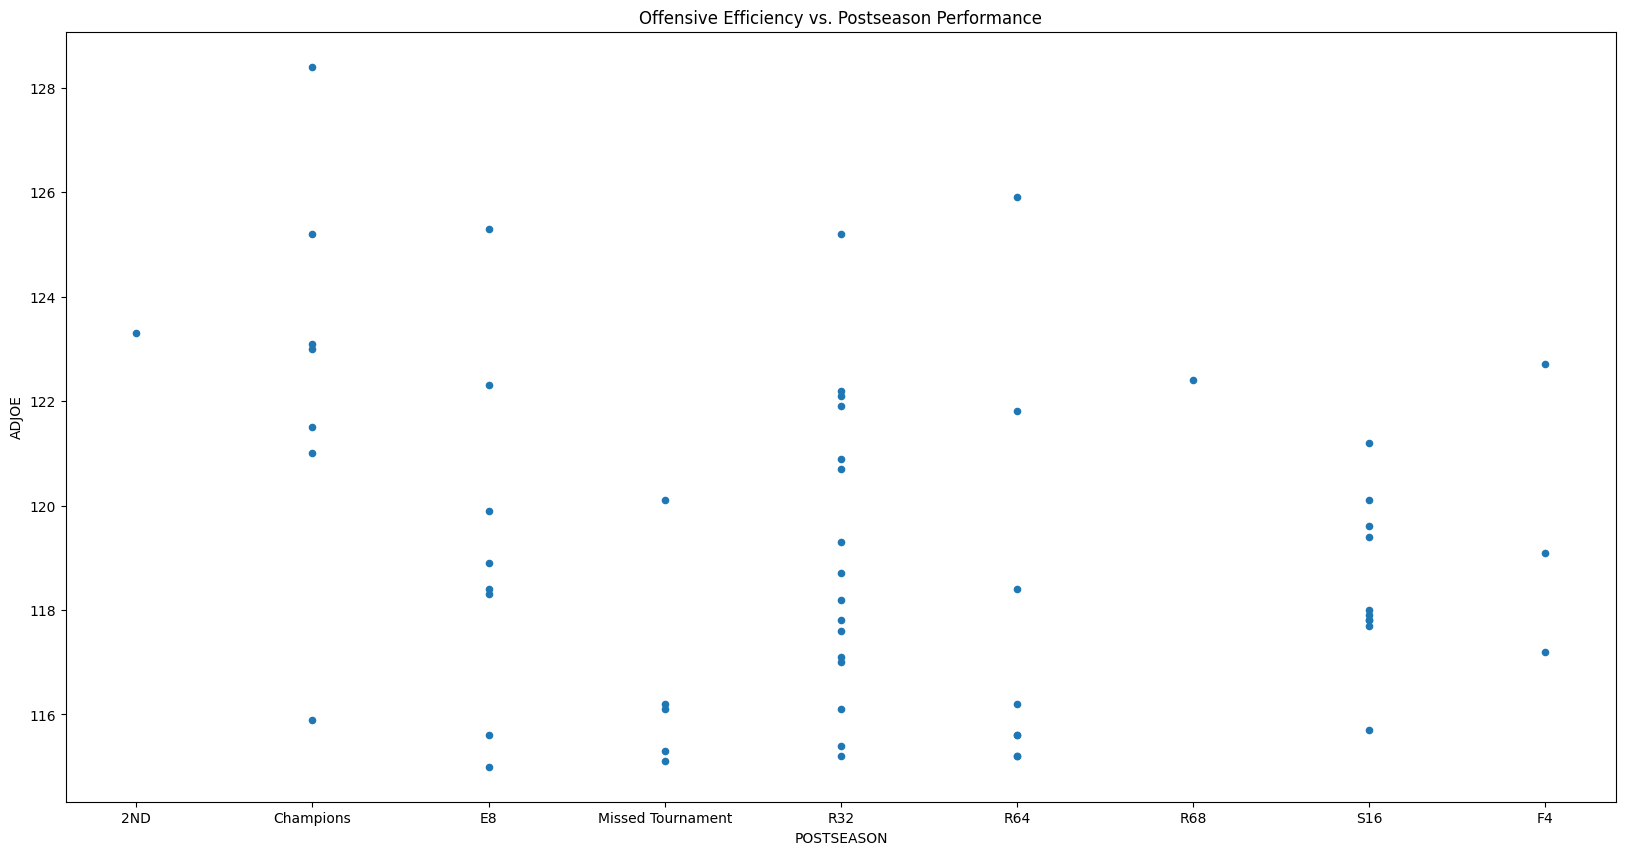

In [83]:
new_ao.plot(kind='scatter', x='POSTSEASON', y='ADJOE', figsize=(20,10))
plt.title('Offensive Efficiency vs. Postseason Performance')
plt.xlabel('POSTSEASON')
plt.ylabel('ADJOE')

### Exploring subsets of data based on specific conditions

In [84]:
new_do = cbb_teams[ (cbb_teams['ADJDE'] <= 92) ].copy()
new_do.sort_values(by=['ADJDE'], ascending=True)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2040,Virginia,ACC,34,30,112.1,84.1,0.9648,50.6,42.3,15.7,...,28.6,49.7,40.1,35.2,30.8,58.4,10.0,R32,2.0,2015
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
2339,Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,...,35.3,50.2,41.4,35.3,30.7,62.5,6.6,R64,2.0,2013
2161,Virginia,ACC,34,31,114.6,86.7,0.9612,52.7,44.3,14.0,...,26.2,50.1,42.8,38.3,31.0,60.5,11.3,R64,1.0,2018
2045,Virginia,ACC,34,23,111.8,86.9,0.9477,52.4,46.1,15.6,...,33.8,49.7,45.1,38.5,31.7,60.3,5.0,R32,5.0,2017
54,Syracuse,BE,40,30,113.0,87.0,0.9533,49.0,42.6,18.9,...,35.4,48.5,42.6,33.4,28.4,65.4,5.1,F4,4.0,2013
14,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,...,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0,2015
2353,Cincinnati,BE,34,22,104.5,88.3,0.8730,46.2,43.3,19.4,...,32.7,45.5,42.3,31.6,30.4,65.5,1.7,R64,10.0,2013
2071,Butler,BE,34,23,108.5,88.6,0.9115,48.4,46.7,17.0,...,33.4,46.3,47.1,35.6,30.7,63.9,3.5,R32,6.0,2015
20,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0,2019


### Visualization of a relationship between variables

Text(0, 0.5, 'ADJDE')

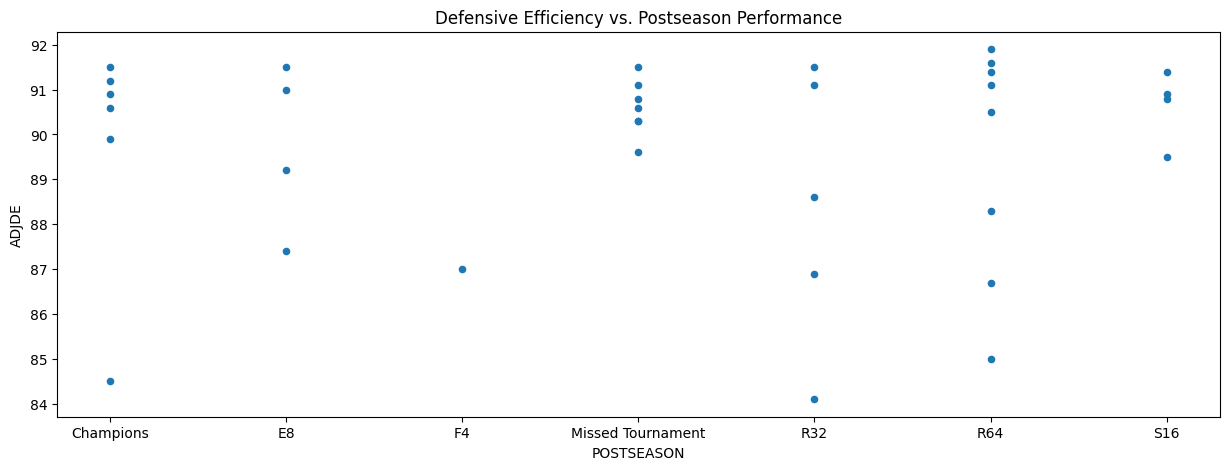

In [85]:
new_do.plot(kind='scatter', x='POSTSEASON', y='ADJDE', figsize=(15,5))
plt.title('Defensive Efficiency vs. Postseason Performance')
plt.xlabel('POSTSEASON')
plt.ylabel('ADJDE')

### Exploring subsets of data based on specific conditions

In [86]:
champs_de = cbb[ (cbb['POSTSEASON'] == 'Champions') ].copy()
champs_de.sort_values(by=['TEAM'], ascending=True)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2456,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,31.7,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1.0,2021
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,35.7,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014
3172,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,37.8,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
2803,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019


### Visualization of specific columns for a subset of data

Text(0, 0.5, 'ADJDE')

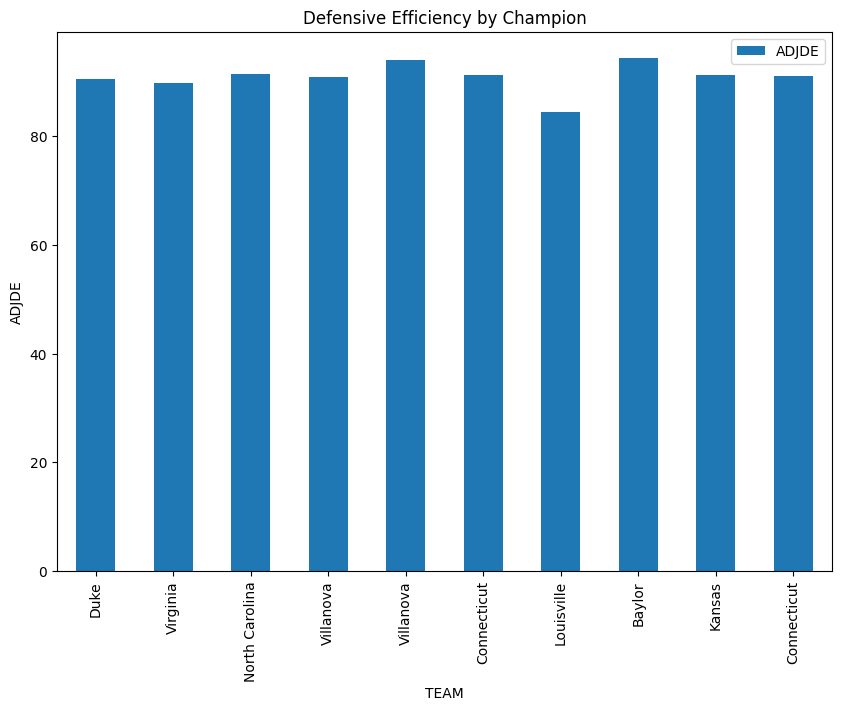

In [87]:
champs_de.plot(kind='bar', x='TEAM', y='ADJDE', figsize=(10,7))
plt.title('Defensive Efficiency by Champion')
plt.xlabel('TEAM')
plt.ylabel('ADJDE')

### Exploring subsets of data based on specific conditions

In [88]:
champs_oe = cbb[ (cbb['POSTSEASON'] == 'Champions') ].copy()
champs_oe.sort_values(by=['TEAM'], ascending=True)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2456,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,31.7,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1.0,2021
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,35.7,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014
3172,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,37.8,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
2803,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019


### Visualization of specific columns for a subset of data

Text(0, 0.5, 'ADJOE')

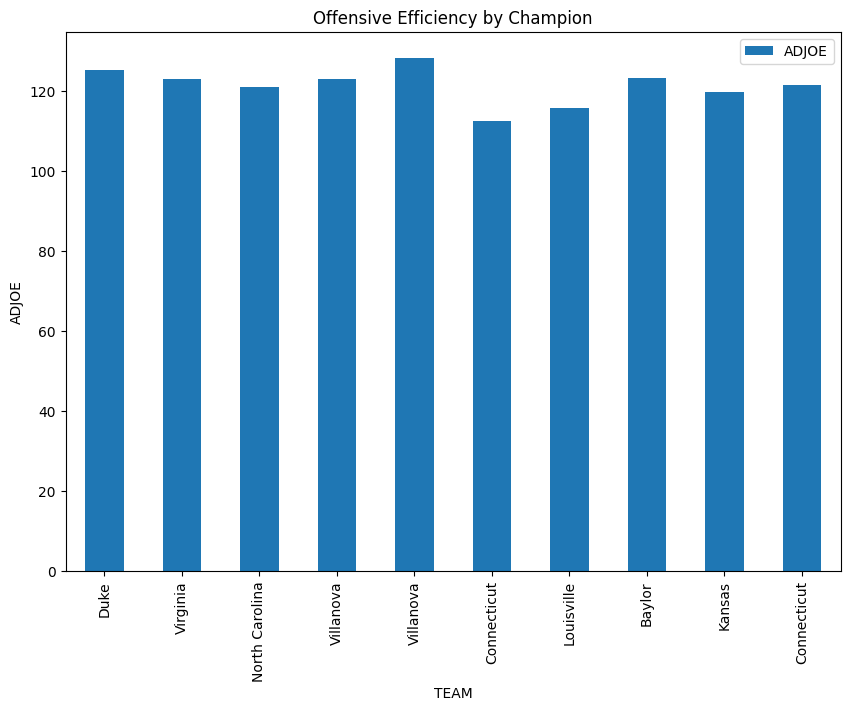

In [89]:
champs_oe.plot(kind='bar', x='TEAM', y='ADJOE', figsize=(10,7))
plt.title('Offensive Efficiency by Champion')
plt.xlabel('TEAM')
plt.ylabel('ADJOE')

### Data sorting and linear mapping for a specific column

In [90]:
df = df.sort_values(by=['TEAM', 'YEAR'])
postseason_mapping = {'Champions': 1, '2ND': 2, 'F4': 4, 'E8': 8, 'S16': 16, 'R32': 32, 'R64': 64, 'R68': 68}
df['POSTSEASON'] = df['POSTSEASON'].replace(postseason_mapping)
df.head(30)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Team_Strenght
1473,Abilene Christian,Slnd,21,2,95.1,116.4,0.0889,47.2,56.4,22.3,...,42.3,56.8,37.3,37.1,64.9,-14.1,NaN,NaN,2014,weak
1252,Abilene Christian,Slnd,28,7,90.6,111.3,0.0854,47.3,55.3,19.8,...,42.0,55.2,37.8,37.0,64.0,-16.8,NaN,NaN,2015,weak
1264,Abilene Christian,Slnd,27,9,96.3,111.8,0.1529,50.5,54.6,19.2,...,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,2016,weak
1276,Abilene Christian,Slnd,25,13,97.5,107.5,0.2450,52.5,52.8,21.0,...,50.7,52.1,37.1,36.1,67.1,-12.5,NaN,NaN,2017,weak
1288,Abilene Christian,Slnd,28,16,96.5,106.6,0.2423,50.4,51.4,20.3,...,51.9,52.3,31.8,33.2,69.8,-11.3,NaN,NaN,2018,weak
2292,Abilene Christian,Slnd,30,27,100.9,100.7,0.5064,51.9,49.8,17.3,...,49.5,49.8,37.7,33.3,67.1,-2.6,64.0,15.0,2019,weak
2511,Abilene Christian,Slnd,23,23,101.8,94.7,0.6977,52.9,45.4,19.4,...,50.8,46.3,37.7,29.1,70.0,-1.1,32.0,14.0,2021,weak
2938,Abilene Christian,WAC,32,25,104.5,99.5,0.6379,48.4,52.0,17.6,...,48.4,52.0,32.2,34.6,70.2,-4.1,NaN,NaN,2022,weak
3317,Abilene Christian,WAC,26,13,104.5,106.5,0.4435,49.2,56.5,17.3,...,48.1,56.2,34.3,38.1,69.0,-10.2,NaN,NaN,2023,weak
1810,Air Force,MWC,30,16,109.2,103.5,0.6481,54.7,51.9,18.5,...,52.9,54.2,38.1,32.4,64.4,-2.9,NaN,NaN,2013,weak


### Data filtering and correlation matrix

In [91]:
selected_columns = ['TEAM', 'W', 'POSTSEASON', '3P_O', '3P_D']
data_filtered = df[selected_columns].copy().dropna()
correlation_matrix = data_filtered[['3P_O', '3P_D', 'W', 'POSTSEASON']].corr()

### Exploring additional columns and correlation matrix

In [92]:
adje_columns = ['TEAM', 'YEAR', 'W', 'POSTSEASON', 'ADJOE', 'ADJDE']
adje_df = df[adje_columns].copy().dropna()
effectiveness = adje_df.copy()
effectiveness['EFF'] = effectiveness['ADJOE'] - effectiveness['ADJDE']

### Extract data for teams' postseason success

In [93]:
good_postseason_teams = adje_df[adje_df['POSTSEASON'] <= 4]
avg_adjde_by_year = good_postseason_teams.groupby('YEAR')['ADJDE'].mean()
avg_adjoe_by_year = good_postseason_teams.groupby('YEAR')['ADJOE'].mean()

In [94]:
features_regression = ['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'SEED', 'EFG_O', 'EFG_D']
df_postseason_teams = df.copy().dropna()
X_regression = df_postseason_teams[features_regression]
y_regression = df_postseason_teams['POSTSEASON']
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, random_state=1)

# Linear Mapping
linear_postseason_mapping = {68: 1, 64: 2, 32: 3, 16: 4, 8: 5, 4: 6, 2: 7, 1: 8}
df_postseason_teams['POSTSEASON'] = df_postseason_teams['POSTSEASON'].replace(linear_postseason_mapping)

In [95]:
features_classification = ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']
target_classification = df['W']
X_classification = df[features_classification]
y_classification = target_classification.apply(lambda x: 'strong' if x > 10 else ('average' if x > 0 else 'weak'))
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

In [96]:
features_rating = ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']
target_rating = df['BARTHAG']
X_rating = df[features_rating]
y_rating = target_rating
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(X_rating, y_rating, test_size=0.2, random_state=42)

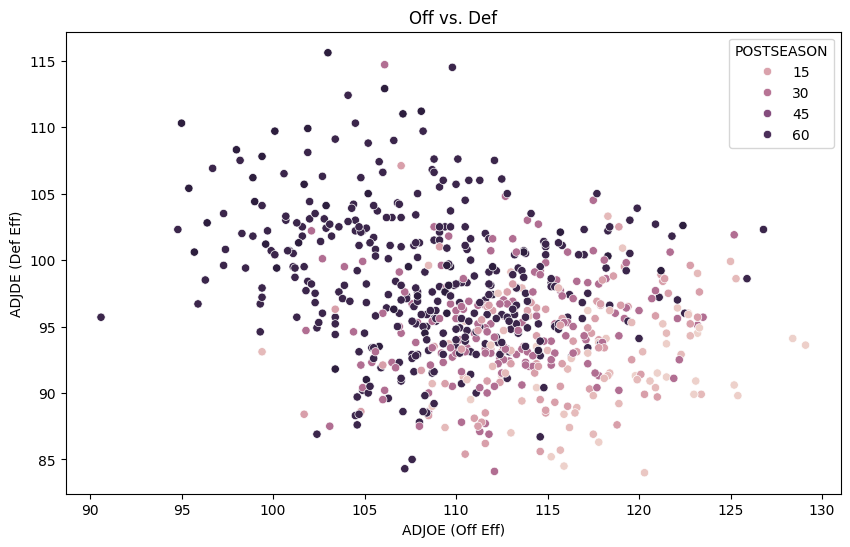

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ADJOE', y='ADJDE', data=df, hue='POSTSEASON')
plt.title('Off vs. Def')
plt.xlabel('ADJOE (Off Eff)')
plt.ylabel('ADJDE (Def Eff)')
plt.show()

### First model for evaluation

In [98]:
first_model = RandomForestRegressor(random_state=1)
first_model.fit(X_train_regression, y_train_regression)
predictions_regression = first_model.predict(X_test_regression)
first_model_mae = mean_absolute_error(predictions_regression, y_test_regression)
print(f"Regression Model Mean Absolute Error: {first_model_mae}")

Regression Model Mean Absolute Error: 13.185058823529411


In [99]:
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)
predictions_classification = model_classification.predict(X_test_classification)
accuracy_classification = accuracy_score(y_test_classification, predictions_classification)
print(f"Classification Model Accuracy: {accuracy_classification:.2f}")

Classification Model Accuracy: 0.90


In [100]:
model_rating = LinearRegression()
model_rating.fit(X_train_rating, y_train_rating)
predictions_rating = model_rating.predict(X_test_rating)
mse_rating = mean_squared_error(y_test_rating, predictions_rating)
print(f"Rating System Model Mean Squared Error: {mse_rating}")

Rating System Model Mean Squared Error: 0.0020537310204636386


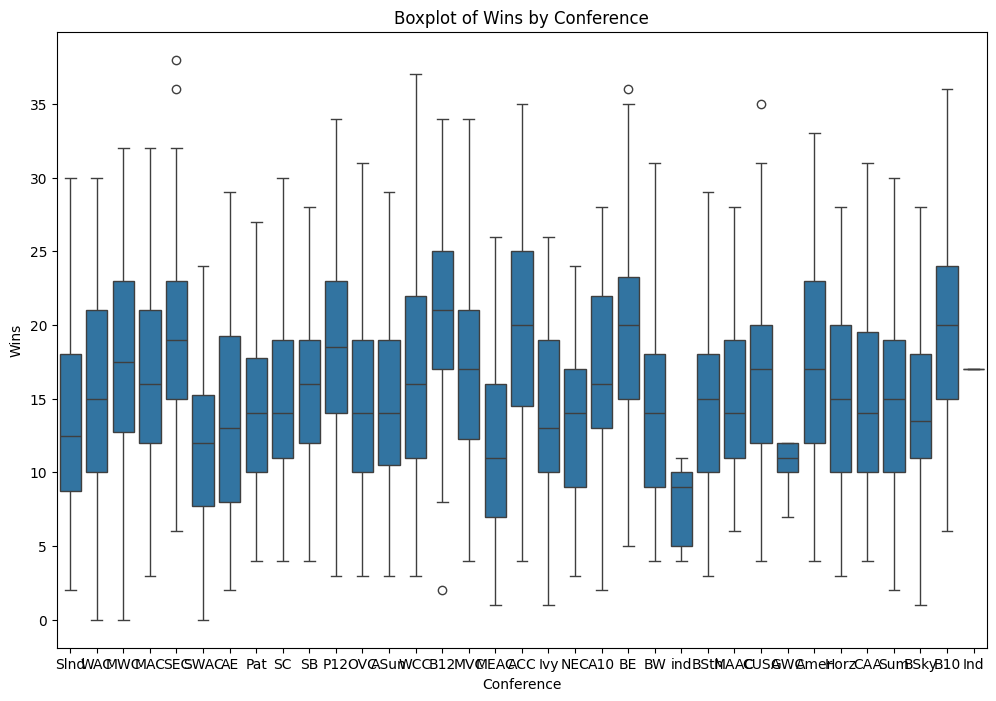

In [101]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CONF', y='W', data=df)
plt.title('Boxplot of Wins by Conference')
plt.xlabel('Conference')
plt.ylabel('Wins')
plt.show()

### Conference Pairplot

Conference-wise Summary Statistics:
       count       mean       std   min    25%   50%    75%   max
CONF                                                            
A10   142.0  16.985915  6.042387   2.0  13.00  16.0  22.00  28.0
ACC   147.0  19.673469  6.825780   4.0  14.50  20.0  25.00  35.0
AE     92.0  14.076087  6.911105   2.0   8.00  13.0  19.25  29.0
ASun   95.0  14.442105  5.740331   3.0  10.50  14.0  19.00  29.0
Amer  100.0  17.820000  7.102966   4.0  12.00  17.0  23.00  33.0
B10   136.0  19.911765  5.946017   6.0  15.00  20.0  24.00  36.0
B12   100.0  20.550000  5.995579   2.0  17.00  21.0  25.00  34.0
BE    108.0  19.564815  6.482576   5.0  15.00  20.0  23.25  36.0
BSky  114.0  14.096491  5.924255   1.0  11.00  13.5  18.00  28.0
BSth  111.0  14.153153  5.871655   3.0  10.00  15.0  18.00  29.0
BW     97.0  14.360825  5.905833   4.0   9.00  14.0  18.00  31.0
CAA   103.0  15.252427  6.146446   4.0  10.00  14.0  19.50  31.0
CUSA  137.0  16.569343  6.541492   4.0  12.00  17.0  

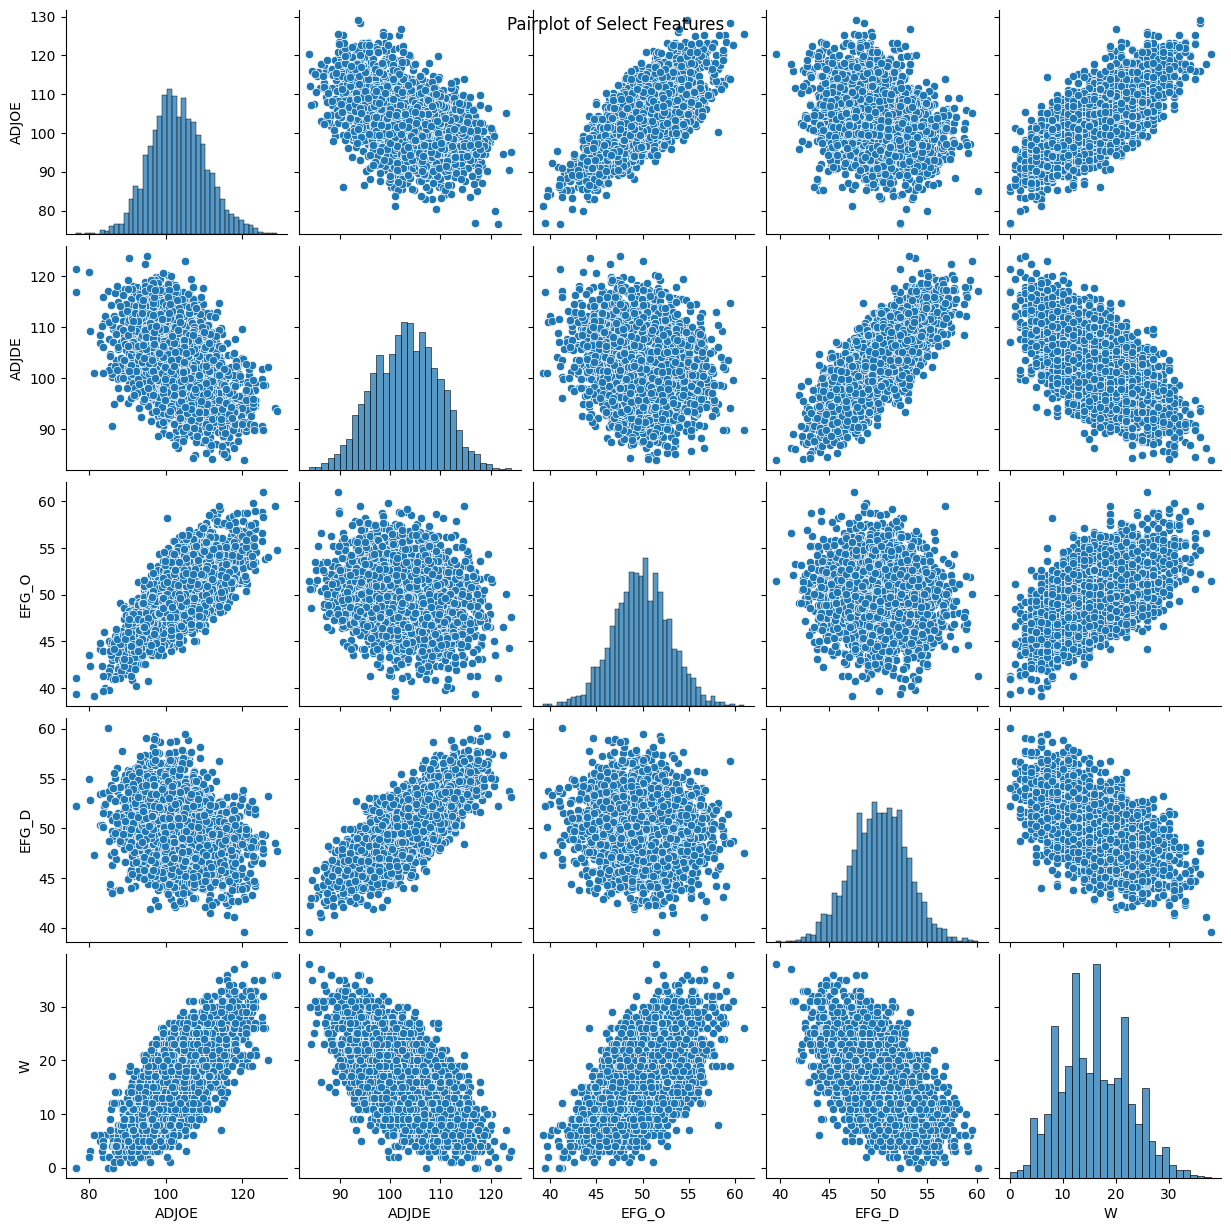

In [102]:
conference_summary = df.groupby('CONF')['W'].describe()
print("Conference-wise Summary Statistics:\n", conference_summary)

selected_features_pairplot = df[['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'W']]
sns.pairplot(selected_features_pairplot)
plt.suptitle('Pairplot of Select Features')
plt.show()

### Correlation

In [103]:
correlation_matrix_additional = df[['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'W']].corr()
print("Correlation Matrix of Select Features:\n", correlation_matrix_additional)

Correlation Matrix of Select Features:
           ADJOE     ADJDE     EFG_O     EFG_D         W
ADJOE  1.000000 -0.494039  0.723180 -0.306172  0.736713
ADJDE -0.494039  1.000000 -0.195558  0.785367 -0.655700
EFG_O  0.723180 -0.195558  1.000000 -0.104251  0.590957
EFG_D -0.306172  0.785367 -0.104251  1.000000 -0.585786
W      0.736713 -0.655700  0.590957 -0.585786  1.000000


In [104]:
model_classification = LogisticRegression(random_state=42, multi_class='multinomial')
model_classification.fit(X_train_classification, y_train_classification)
predictions_classification = model_classification.predict(X_test_classification)
accuracy_classification = accuracy_score(y_test_classification, predictions_classification)
print(f"Classification Model Accuracy: {accuracy_classification:.2f}")

Classification Model Accuracy: 0.90


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
model_rating = LinearRegression()
model_rating.fit(X_train_rating, y_train_rating)
predictions_rating = model_rating.predict(X_test_rating)
mse_rating = mean_squared_error(y_test_rating, predictions_rating)
print(f"Rating System Model Mean Squared Error: {mse_rating}")

model_rating_tree = DecisionTreeRegressor(random_state=42)
model_rating_tree.fit(X_train_rating, y_train_rating)
predictions_rating_tree = model_rating_tree.predict(X_test_rating)
mse_rating_tree = mean_squared_error(y_test_rating, predictions_rating_tree)
print(f"Rating System Decision Tree Model Mean Squared Error: {mse_rating_tree}")

Rating System Model Mean Squared Error: 0.0020537310204636386


Rating System Decision Tree Model Mean Squared Error: 0.0008799337730496454


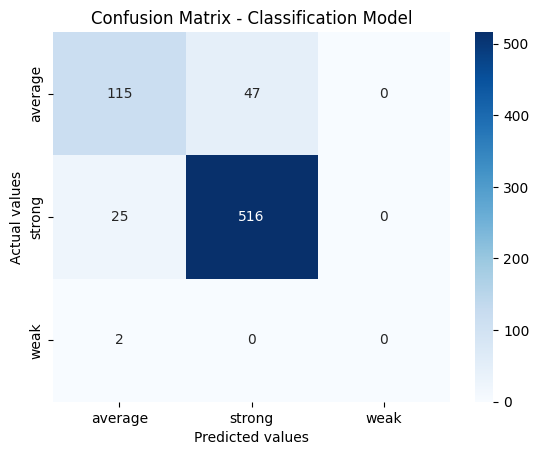

In [106]:
conf_matrix_classification = confusion_matrix(y_test_classification, predictions_classification)
sns.heatmap(conf_matrix_classification, annot=True, fmt='g', cmap='Blues', xticklabels=model_classification.classes_, yticklabels=model_classification.classes_)
plt.title('Confusion Matrix - Classification Model')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

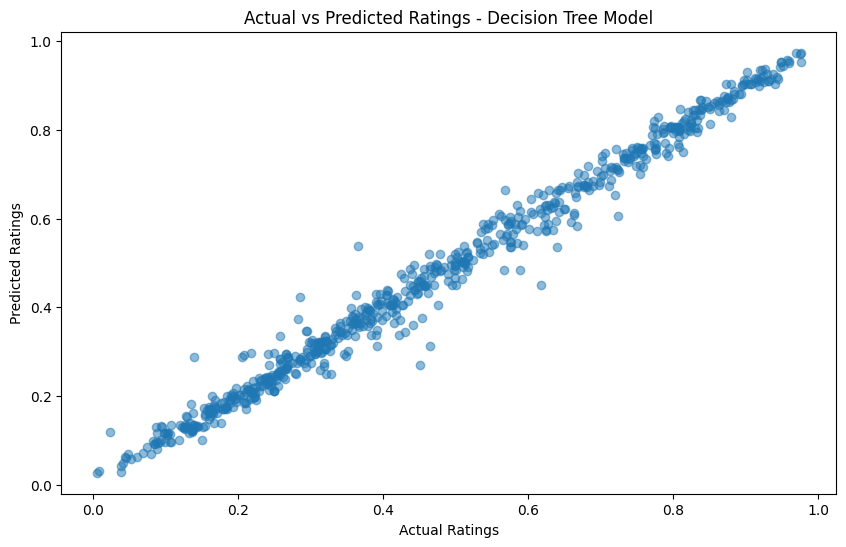

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rating, predictions_rating_tree, alpha=0.5)
plt.title('Actual vs Predicted Ratings - Decision Tree Model')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### GridSearchCV

In [108]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rating, y_train_rating)
best_model_rating_tree = grid_search.best_estimator_
predictions_rating_tree = best_model_rating_tree.predict(X_test_rating)

mse_rating_tree = mean_squared_error(y_test_rating, predictions_rating_tree)
print(f"Rating System Decision Tree Model Mean Squared Error: {mse_rating_tree}")

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Rating System Decision Tree Model Mean Squared Error: 0.0007928285221738151
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


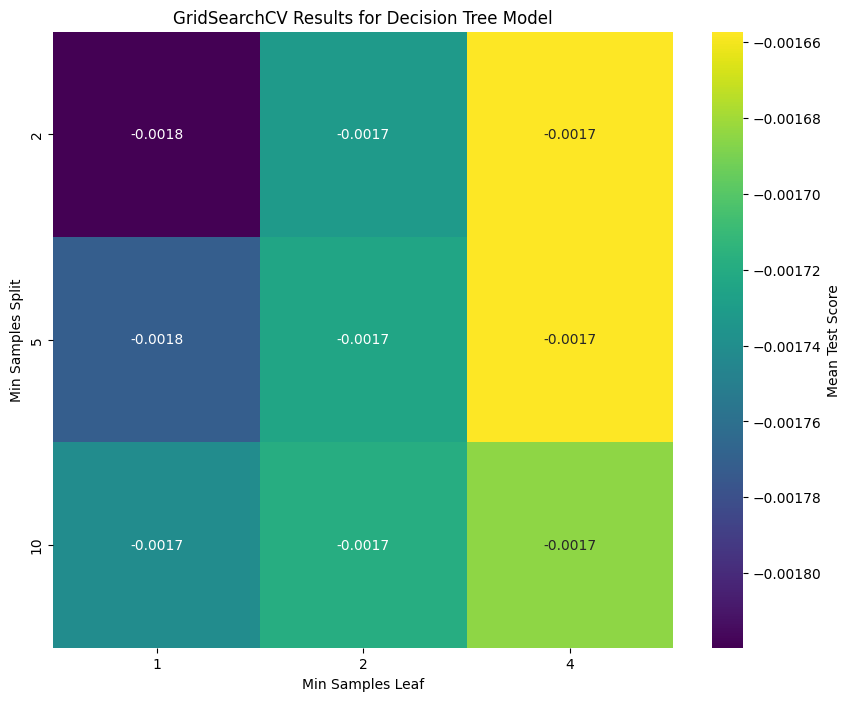

In [109]:
results = pd.DataFrame(grid_search.cv_results_)

heatmap_data = results.pivot_table(index='param_min_samples_split', columns='param_min_samples_leaf', values='mean_test_score', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
plt.title('GridSearchCV Results for Decision Tree Model')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Min Samples Split')
plt.show()